# 課題

1. 入力画像を3色に変換せよ．（赤，緑，青）

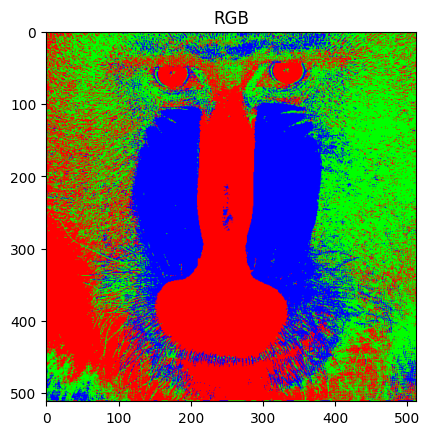

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def replace_nearest_color(img: np.ndarray, colors: list[list[int]]):
    "各画素を最も近い基準色で置き換える関数"
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape
    
    out = np.zeros_like(img)
    dist = np.zeros([H, W, len(colors)])
    for i, c in enumerate(colors):
        dist[:, : , i] = np.sqrt(np.sum((img - c) ** 2, axis=2))
    
    mini = np.argmin(dist, axis=2)
    for i, c in enumerate(colors):
        out[mini == i] = colors[i]
    return out

img = io.imread("imgs/baboon.png")
rgb = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
img_rgb = replace_nearest_color(img, colors=rgb)
plt.title('RGB')
plt.imshow(img_rgb)


2. 4色に変換せよ．（赤．緑，青，黒）

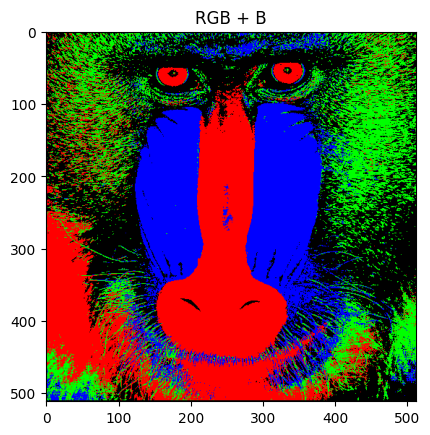

In [13]:
img = io.imread("imgs/baboon.png")
rgbb = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 0, 0]]
img_rgbb = replace_nearest_color(img, colors=rgbb)
plt.title('RGB + B')
plt.imshow(img_rgbb)

3. 5色に変換せよ．（赤．緑，青，黒，白）

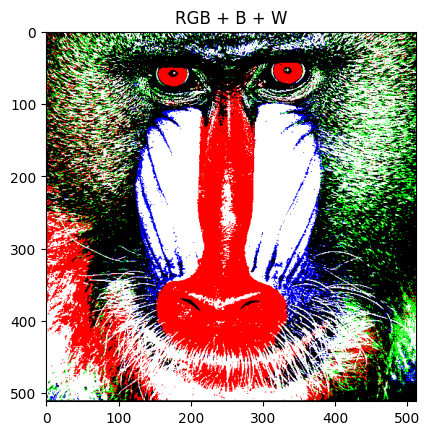

In [14]:
img = io.imread("imgs/baboon.png")
rgbbw = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 0, 0], [255, 255, 255]]
img_rgbbw = replace_nearest_color(img, colors=rgbbw)
plt.title('RGB + B + W')
plt.imshow(img_rgbbw)

4. 11 * 11のフィルタで平滑化した画像を出力せよ．

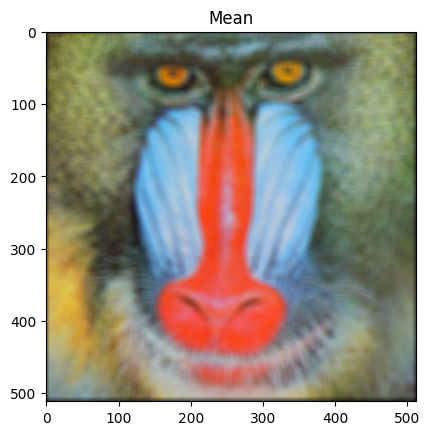

In [15]:
def mean_filter(img: np.ndarray, kernel_size: int = 3):
    "平均化フィルタを適用する関数"
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    # ゼロ埋め
    pad = kernel_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    tmp_out = out.copy()

    # フィルタリング
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.mean(tmp_out[y: y + kernel_size, x: x + kernel_size, c])

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = io.imread("imgs/baboon.png")
img_mean = mean_filter(img, kernel_size=11)
plt.title('Mean')
plt.imshow(img_mean)

5. 平滑化した画像を3色に返還せよ．（赤，緑，青）

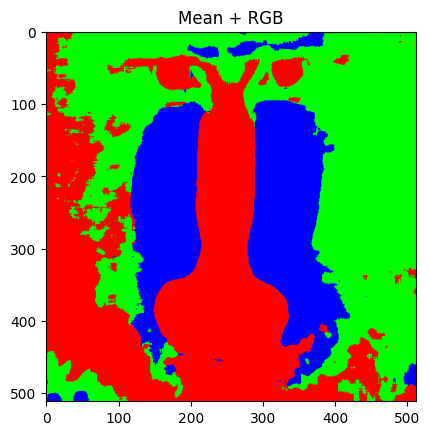

In [16]:
img = io.imread("imgs/baboon.png")
img_mean = mean_filter(img, kernel_size=11)
rgb = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
img_mean_rgb = replace_nearest_color(img_mean, colors=rgb)
plt.title('Mean + RGB')
plt.imshow(img_mean_rgb)